In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
train_feature = pd.read_csv('dengue_features_train.csv')
train_lebels = pd.read_csv('dengue_labels_train.csv')

In [68]:
train_lebels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [25]:
train_feature.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [26]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [29]:
train_feature = train_feature.drop('week_start_date', axis=1)

In [30]:
train_feature.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [32]:
def mean_imputation(df):
    for col in df.columns:
        if df[col].isnull().sum() != 0:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    return df

In [34]:
train_feature = mean_imputation(train_feature)
train_feature

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [35]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   ndvi_ne                                1456 non-null   float64
 4   ndvi_nw                                1456 non-null   float64
 5   ndvi_se                                1456 non-null   float64
 6   ndvi_sw                                1456 non-null   float64
 7   precipitation_amt_mm                   1456 non-null   float64
 8   reanalysis_air_temp_k                  1456 non-null   float64
 9   reanalysis_avg_temp_k                  1456 non-null   float64
 10  reanalysis_dew_point_temp_k            1456 non-null   float64
 11  rean

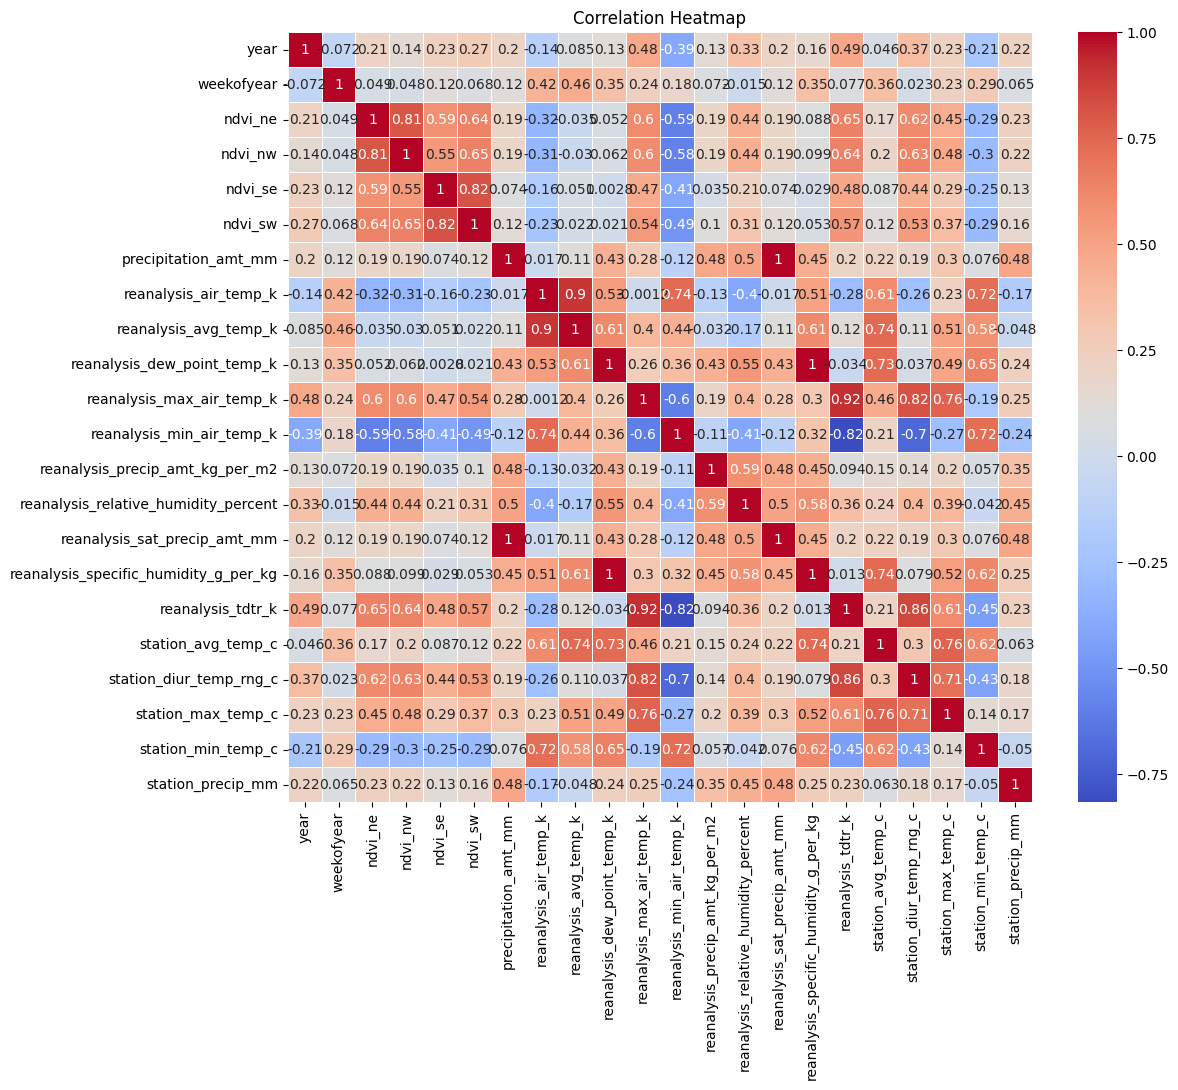

In [39]:
# Calculate the correlation matrix
numeric_columns = train_feature.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
correlation_threshold = 0.7  # Adjust this value as needed

# Find highly correlated variable pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

print("Highly Correlated Variable Pairs:")
for pair in highly_correlated_pairs:
    print(pair)

Highly Correlated Variable Pairs:
('ndvi_ne', 'ndvi_nw')
('ndvi_se', 'ndvi_sw')
('precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm')
('reanalysis_air_temp_k', 'reanalysis_avg_temp_k')
('reanalysis_air_temp_k', 'reanalysis_min_air_temp_k')
('reanalysis_air_temp_k', 'station_min_temp_c')
('reanalysis_avg_temp_k', 'station_avg_temp_c')
('reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg')
('reanalysis_dew_point_temp_k', 'station_avg_temp_c')
('reanalysis_max_air_temp_k', 'reanalysis_tdtr_k')
('reanalysis_max_air_temp_k', 'station_diur_temp_rng_c')
('reanalysis_max_air_temp_k', 'station_max_temp_c')
('reanalysis_min_air_temp_k', 'reanalysis_tdtr_k')
('reanalysis_min_air_temp_k', 'station_min_temp_c')
('reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c')
('reanalysis_tdtr_k', 'station_diur_temp_rng_c')
('station_avg_temp_c', 'station_max_temp_c')
('station_diur_temp_rng_c', 'station_max_temp_c')


In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_feature['city'] = label_encoder.fit_transform(train_feature['city'])

# The encoded data is now stored in the 'data' DataFrame


In [49]:
train_feature.tail()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,0,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,0,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,0,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,0,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,0,2010,25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [43]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   int32  
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   ndvi_ne                                1456 non-null   float64
 4   ndvi_nw                                1456 non-null   float64
 5   ndvi_se                                1456 non-null   float64
 6   ndvi_sw                                1456 non-null   float64
 7   precipitation_amt_mm                   1456 non-null   float64
 8   reanalysis_air_temp_k                  1456 non-null   float64
 9   reanalysis_avg_temp_k                  1456 non-null   float64
 10  reanalysis_dew_point_temp_k            1456 non-null   float64
 11  rean

In [51]:
lebel = train_lebels['total_cases']

In [52]:
lebel

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_feature, lebel, test_size=0.2, random_state=42)

# Initialize regression models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor()
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - Mean Absolute Error: {mae:.2f}")


LinearRegression - Mean Absolute Error: 24.09
Ridge - Mean Absolute Error: 24.07
Lasso - Mean Absolute Error: 24.14
ElasticNet - Mean Absolute Error: 24.00
DecisionTreeRegressor - Mean Absolute Error: 18.61
RandomForestRegressor - Mean Absolute Error: 14.53
GradientBoostingRegressor - Mean Absolute Error: 15.02
SVR - Mean Absolute Error: 25.68
KNeighborsRegressor - Mean Absolute Error: 24.93


In [60]:
test_feature = pd.read_csv('dengue_features_test.csv')
test_feature['city'] = label_encoder.fit_transform(test_feature['city'])
test_feature = test_feature.drop('week_start_date', axis=1)

In [69]:
test_feature

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,1,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,1,2008,20,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,1,2008,21,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,1,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0,2013,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,0,2013,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,0,2013,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,0,2013,25,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [62]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you've trained your RandomForestRegressor and have X_train, y_train

# Initialize and train the model
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

from sklearn.impute import SimpleImputer

# Initialize an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the test data
test_feature_imputed = imputer.fit_transform(test_feature)

# Now, make predictions on the imputed test data
predictions = best_model.predict(test_feature_imputed)


C:\Users\Debasish Sadangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [63]:
predictions

array([ 3.8 ,  5.49,  5.29,  7.92,  8.87, 10.99, 11.92, 13.03, 17.51,
       22.51, 22.51, 21.73, 27.97, 28.19, 45.79, 47.29, 33.35, 49.19,
       68.04, 77.32, 52.03, 36.  , 28.09, 39.66, 36.14, 26.67, 30.36,
       33.79, 30.27, 29.35, 22.24, 24.9 , 15.06, 13.81, 21.49, 18.01,
       14.94, 15.56, 15.19, 11.83, 11.09, 10.54,  8.61, 11.51,  5.7 ,
        5.44,  5.92,  3.2 ,  4.89,  2.78,  4.31,  4.85,  5.62,  5.76,
        6.42,  4.62,  9.86,  8.38,  9.55, 14.44, 13.55, 20.81, 32.03,
       29.77, 31.77, 45.6 , 45.99, 42.59, 62.  , 43.89, 63.18, 30.67,
       51.63, 43.94, 67.98, 71.92, 67.51, 50.84, 35.4 , 26.79, 28.81,
       32.36, 27.66, 20.94, 21.96, 21.63, 25.63,  8.99, 17.55, 11.91,
       17.29, 13.68, 11.41, 19.14, 13.65, 12.26, 12.93,  8.95,  4.73,
       10.14, 10.8 ,  7.1 ,  3.91,  4.9 , 15.72, 14.02,  9.3 , 14.36,
       13.1 , 27.97, 42.21, 34.46, 22.38, 31.82, 41.7 , 44.2 , 44.32,
       27.18, 42.01, 67.77, 62.16, 49.05, 98.79, 70.33, 73.27, 56.16,
       55.44, 55.72,

In [64]:
import math



# Round up each float value in the list
rounded_up_prediction = [math.ceil(x) for x in predictions]

In [66]:
submission = pd.read_csv('submission_format.csv')

In [70]:
submission['total_cases'] = rounded_up_prediction

In [71]:
submission

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,6
2,sj,2008,20,6
3,sj,2008,21,8
4,sj,2008,22,9
...,...,...,...,...
411,iq,2013,22,5
412,iq,2013,23,4
413,iq,2013,24,3
414,iq,2013,25,4


In [72]:
submission.to_csv('submission.csv', index=False)